# Linear Regression

In [1]:
# imports

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

/home/sujit25/anaconda3/envs/ml_env/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


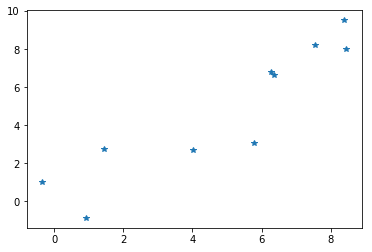

In [2]:
# generate sample data
X = np.linspace(0,10,10) + np.random.uniform(-2, 2, 10)
Y = np.linspace(0,10,10) + np.random.uniform(-2, 2, 10)

plt.plot(X,Y,'*')
plt.show()

In [3]:
# define tensorflow graph

x = tf.placeholder(dtype=tf.float32, name='x')
y = tf.placeholder(dtype=tf.float32, name='y')

m = tf.Variable(initial_value = tf.random_normal(shape=(1,1),mean=0, stddev=1.0, dtype=tf.float32))
b = tf.zeros(shape=(1,1), dtype= tf.float32)

y_ = tf.add(tf.multiply(x, m), b)

cost  = tf.reduce_mean(tf.square((y-y_)))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-4).minimize(cost)
cost_hist = []
predicted_values = None
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_epochs = 1000   
    for epoch_no in range(num_epochs):
        computed_cost,_ = sess.run([cost, optimizer], feed_dict={x :X, y : Y})
        cost_hist.append(computed_cost)
        if epoch_no% 100 == 0:
            print(" epoch: {}, cost: {}".format(epoch_no, computed_cost))
    opt_m, opt_b = sess.run([m,b])

    # use opt_m and opt_b for prediction
    prediction = tf.add(tf.multiply(x,opt_m), opt_b)
    predicted_values =sess.run(prediction, feed_dict={x : X})

 epoch: 0, cost: 325.96527099609375
 epoch: 100, cost: 87.57369232177734
 epoch: 200, cost: 24.499711990356445
 epoch: 300, cost: 7.8115034103393555
 epoch: 400, cost: 3.3961167335510254
 epoch: 500, cost: 2.227886199951172
 epoch: 600, cost: 1.9187942743301392
 epoch: 700, cost: 1.8370141983032227
 epoch: 800, cost: 1.8153769969940186
 epoch: 900, cost: 1.809652328491211


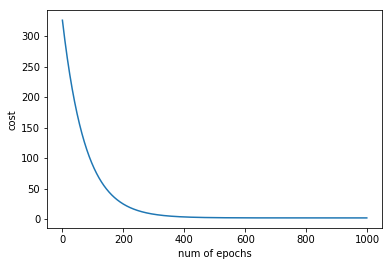

In [4]:
# plot variation of cost with epochs
plt.plot(range(num_epochs), cost_hist)
plt.xlabel('num of epochs')
plt.ylabel('cost')
plt.show()

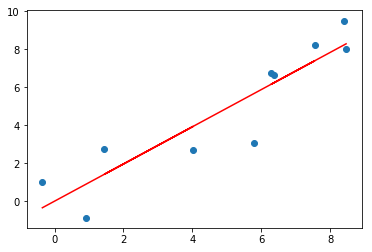

In [7]:
# plot actual values and prediction line
plt.scatter(X,Y)
plt.plot(X, predicted_values.reshape(-1,1),'r')
plt.show()